### Add the scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 6\Bati-Bank-Credit-Scoring\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load the Data

In [4]:
PATH = "../data/data.csv"

data = pd.read_csv(PATH)

### Start of EDA

In [5]:
from scripts.exploratory_data_analyzer import EDAAnalyzer

# initialize the EDA analyzer
eda_analyzer = EDAAnalyzer(data=data)

#### 1. Basic Overview and summary statistics 

- Get basic info of the data's structure and column type definitions

In [6]:
eda_analyzer.basic_overview()

The data has a shape of: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-n

- Generate descriptive statistics for the numerical data

In [7]:
eda_analyzer.summary_statistics()

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


- Missing data identification

In [8]:
eda_analyzer.missing_values()

These are columns with missing values greater than 0%:
Series([], dtype: float64)


**Observations**:
- The transactional data has no missing values, this indicates that the data collection is well structured and seems not that error prone


#### 2. Univariate Analysis

- Outlire detection

In [9]:
# first obtain the numerical data
numerical_data = data._get_numeric_data()

# obtain the columns
numerical_cols = numerical_data.columns

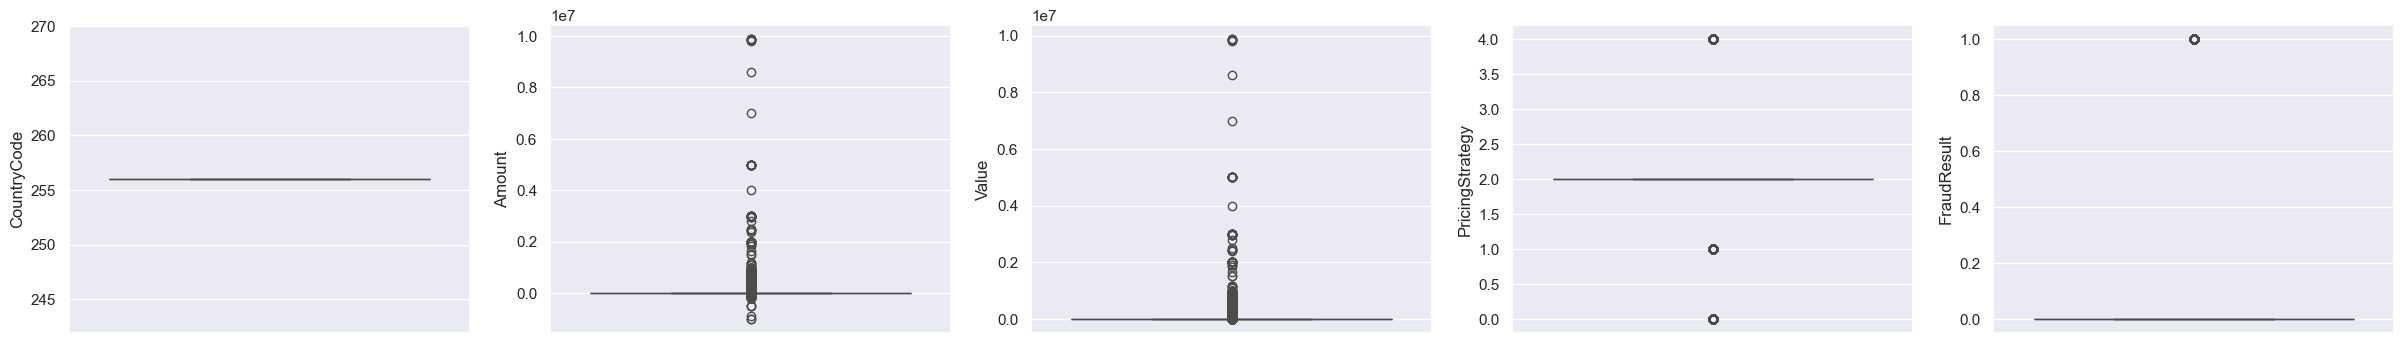

In [10]:
# decide the number of cols in an image
NUM_COLS = 5

# calculate the number of rows
num_rows = math.ceil(len(numerical_cols) / NUM_COLS)

# create subpltos
fig, axes = plt.subplots(ncols=NUM_COLS, nrows=num_rows, figsize=(30, 4 * num_rows))

# flatten the axes
axes = axes.flatten()

for idx, column in enumerate(numerical_cols):
    sns.boxplot(data=data[column], ax=axes[idx])
plt.show()

From the box plots we can see that:
    - CountryCode, FraudResult, 